# Dataset Information

Million Songs Dataset contains of two files: triplet_file and metadata_file. The triplet_file contains user_id, song_id and listen time. The metadata_file contains song_id, title, release, year and artist_name. Million Songs Dataset is a mixture of song from various website with the rating that users gave after listening to the song.

There are 3 types of recommendation system: content-based, collaborative and popularity.

In [9]:
# import modules

In [1]:
import pandas as pd
import numpy as np

In [10]:
# loading the dataset

In [2]:
profile_df = pd.read_csv('dataset/taste_profile_song_to_tracks.txt', delimiter = '\t', names = ['song_id', 'user_id'])

In [3]:
profile_df

,song_id,user_id
0,SOAAADD12AB018A9DD,TRNCENP12903C9EF3A
1,SOAAADE12A6D4F80CC,TRSKKFK128F148B615
2,SOAAADF12A8C13DF62,TRCQMSP128F428A6F7
3,SOAAADZ12A8C1334FB,TRMDNZY128F425A532
4,SOAAAFI12A6D4F9C66,TRZEXLQ128F1491D17
...,...,...
386208,SOZZZRJ12AB0187A75,TRTMMRY12903CDE19D
386209,SOZZZRV12A8C1361F1,TRCEWAR128F425D1B6
386210,SOZZZSR12AB01854CD,TRPUDMM128F9308E1C
386211,SOZZZWD12A6D4F6624,TRJMEUS128F1458975


In [5]:
triplet_df = pd.read_csv('dataset/kaggle_visible_evaluation_triplets.txt',
                         delimiter = '\t',
                         names = ['user_id', 'song_id', 'listen_count'])

In [22]:
triplet_df.head()

,user_id,song_id,listen_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [24]:
users_df = pd.read_csv('dataset/kaggle_users.txt', sep = '\t', names = ['user_id'])

In [25]:
users_df.head()

,user_id
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d
1,d7083f5e1d50c264277d624340edaaf3dc16095b
2,d68dc6fc25248234590d7668a11e3335534ae4b4
3,9be82340a8b5ef32357fe5af957ccd54736ece95
4,841b2394ae3a9febbd6b06497b4a8ee8eb24b7f8


In [28]:
songs_df = pd.read_csv('dataset/kaggle_songs.txt', sep = ' ', names = ['song_id', 'index'], index_col='index')

In [29]:
songs_df.head()

,song_id
index,
1,SOAAADD12AB018A9DD
2,SOAAADE12A6D4F80CC
3,SOAAADF12A8C13DF62
4,SOAAADZ12A8C1334FB
5,SOAAAFI12A6D4F9C66


In [30]:
users_df.shape

(110000, 1)

In [31]:
songs_df.shape

(386213, 1)

In [32]:
triplet_df

,user_id,song_id,listen_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
...,...,...,...
1450928,5e650759ebf89012044c6d52121eeada8b0ec814,SOVLNXV12A6D4F706E,1
1450929,5e650759ebf89012044c6d52121eeada8b0ec814,SOVDSJC12A58A7A271,2
1450930,5e650759ebf89012044c6d52121eeada8b0ec814,SOBRHVR12A8C133F35,2
1450931,5e650759ebf89012044c6d52121eeada8b0ec814,SOMGVYU12A8C1314FF,2


# Exploratory Data Analysis

In [33]:
import matplotlib.pyplot as plt
import seaborn as sbn

In [67]:
song_popularity = triplet_df.groupby('song_id').sum()

In [72]:
song_popularity.sort_values(by='listen_count', ascending=False)

,listen_count
song_id,
SOBONKR12A58A7A7E0,35432
SOAUWYT12A81C206F1,33179
SOSXLTC12AF72A7F54,24359
SOFRQTD12A81C233C0,19454
SOEGIYH12A6D4FC0E3,17115
...,...
SOKEJSK12AC468A801,1
SOUGBCY12AB01850C9,1
SOKEJSK12A6D4FC1EB,1


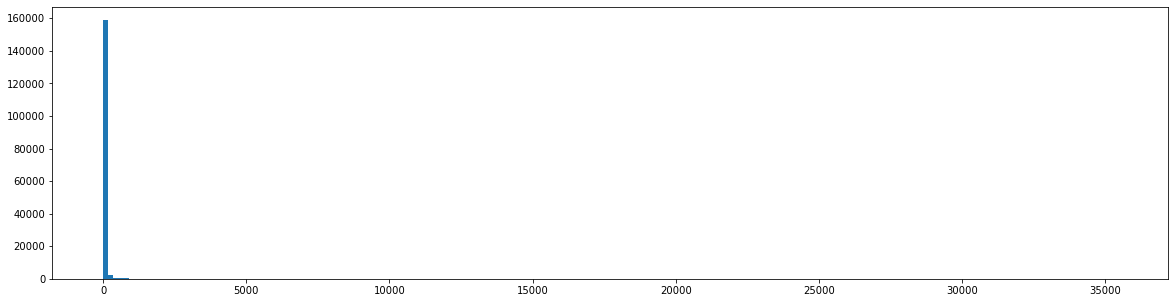

In [96]:
plt.figure(figsize=(20, 5))
plt.hist(song_popularity, bins=200)
plt.show()

From the above histogram, we can see that most of the songs are undiscovered, and have very low listen count.

In [112]:
# lets now see the no of songs users had listened to
user_songs = triplet_df.groupby('user_id').count().drop(columns='listen_count')

In [114]:
user_songs.columns = ['song_count']

In [115]:
user_songs

,song_count
user_id,
00007a02388c208ea7176479f6ae06f8224355b3,9
00014a76ed063e1a749171a253bca9d9a0ff1782,11
00015189668691680bb1a2e58afde1541ec92ced,17
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2,9
00020fcd8b01986a6a85b896ccde6c49f35142ad,32
...,...
fffdef71f13352e9cff769f1d96f5ccf90f8955e,7
fffe29116f96c97b47a5dabdd406784ad0ba6f30,6
fffe5b73c50c72ca9c54947efac1fcacf59c4a17,23


From the plot below, we can observe that very few users have listened to lots of different songs.

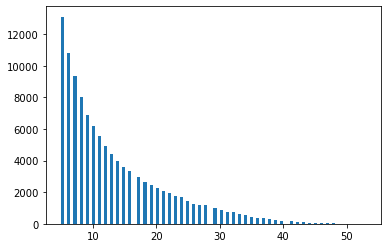

In [117]:
plt.hist(x = user_songs, bins=100)
plt.show()

In [120]:
# lets now analysis how much time does a user spend on listening to the songs
user_listentime = triplet_df.groupby('user_id').sum()
user_listentime.columns = ['listen_time']

From below plot, we can observe that more than 35k users has listen to around 15 songs in app lifetime.

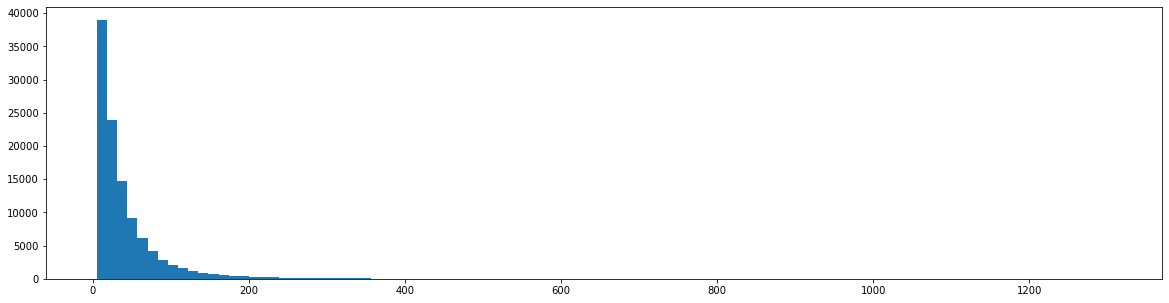

In [123]:
plt.figure(figsize=(20, 5))
plt.hist(x = user_listentime, bins=100)
plt.show()

# Recommendation

input; user-id.

output; the model ouputs 5 songs based on cosine similarity with other user.

i.e.,i will use colaborative filtering


    steps:
        1. find the listen of song_id the given user has listened
        2. create a matrix of songs listened by all the users
        3. find similarity score of the given user with other users
        4. pick the user_ids with highest similarity score
        5. remove the songs that the given user has already listened


In [139]:
# step 1
user_history = triplet_df[triplet_df['user_id'] == 'fd50c4007b68a3737fe052d5a4f78ce8aa117f3d']
user_history

,user_id,song_id,listen_count
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1


There are 386_213 songs in the dataset. A dataframe with 386_213 columns (a column per song) will require a massive computation cost.

In [151]:
songs_df.count()

song_id    386213
dtype: int64

In [160]:
triplet_df.dtypes

user_id         object
song_id         object
listen_count     int64
dtype: object

In [147]:
!pip show gensim

Name: gensim


Version: 4.3.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPL-2.1-only
Location: z:\google\anaconda\lib\site-packages
Requires: Cython, FuzzyTM, numpy, scipy, smart-open
Required-by: 


In [161]:
!pip install gensim numpy

In [188]:
import gensim

ValueError: numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [180]:
triplet_df[['user_id', 'song_id']] = triplet_df[['user_id', 'song_id']].astype('string')

In [181]:
triplet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450933 entries, 0 to 1450932
Data columns (total 3 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   user_id       1450933 non-null  string
 1   song_id       1450933 non-null  string
 2   listen_count  1450933 non-null  int64 
dtypes: int64(1), string(2)
memory usage: 33.2 MB


In [184]:
triplet_df = triplet_df.reset_index()

ValueError: Unstacked DataFrame is too big, causing int32 overflow